## Estimating distributions
----
for the following section, we estimate the distribution of patients treated with the placebo or the drug.

In [2]:
import numpy as np
from scipy.stats import norm, truncnorm
import pandas as pd
import math
import matplotlib.pyplot as plt
import random
import scipy.stats as stats

In [3]:
data = pd.read_csv("data/IMC13.csv")
emesis_data = pd.read_csv("data/IMC14.csv")
patient_drug = pd.read_csv("data/IMCENR.csv")

In [4]:
emesis_data = emesis_data.loc[emesis_data['CHECK_N'].isnull()]

In [5]:
patient_drug = patient_drug.drop(["STUDY","NAMECODE","Q1","Q3","Q4","ELIG","BIRTHDAY","SCREEN","CENTER"],axis=1)

In [6]:
data = pd.merge(data,patient_drug, on="PATIENT")
data.loc[data["STDYDAY"] == 1].reset_index()

,index,STUDY,FORM,CENTER,NAMECODE,PATIENT,DATECOMP,SCREEN,STDYDAY,TIME_ADM,...,Q9_2HR,Q9_2MIN,Q10,Q11,Q12SYS,Q12DIA,Q12HR,Q12RES,Q14TEMP,TREATMNT
0,0,1020,13,733,NaN,213624,0.0,NaN,1,1148,...,11.0,59.0,165.0,98.2,109.0,63.0,67.0,21.0,72.1,LOFEXIDINE
1,7,1020,13,733,NaN,829277,0.0,NaN,1,1500,...,15.0,9.0,220.0,97.6,130.0,76.0,58.0,17.0,73.9,LOFEXIDINE
2,12,1020,13,733,NaN,423257,0.0,NaN,1,1130,...,11.0,39.0,210.0,97.1,132.0,67.0,91.0,20.0,74.1,LOFEXIDINE
3,19,1020,13,733,NaN,164923,0.0,NaN,1,1315,...,13.0,24.0,130.0,97.7,130.0,84.0,70.0,18.0,72.7,PLACEBO
4,25,1020,13,733,NaN,161091,0.0,NaN,1,1125,...,11.0,37.0,138.5,98.2,116.0,86.0,87.0,15.0,71.4,LOFEXIDINE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,450,1020,13,1,NaN,485793,0.0,NaN,1,1419,...,14.0,50.0,147.2,97.5,116.0,74.0,81.0,16.0,79.0,LOFEXIDINE
64,457,1020,13,1,NaN,672396,0.0,NaN,1,1336,...,14.0,11.0,184.6,97.7,140.0,94.0,71.0,14.0,78.0,LOFEXIDINE
65,468,1020,13,1,NaN,472044,0.0,NaN,1,1438,...,15.0,1.0,216.0,98.0,130.0,90.0,74.0,16.0,81.0,PLACEBO
66,473,1020,13,1,NaN,206557,0.0,NaN,1,1253,...,13.0,36.0,156.5,97.9,116.0,76.0,81.0,12.0,76.0,PLACEBO


In [7]:
emesis_data['count'] = 1 #setup emesis data
for i in range(0,len(emesis_data.index)):
    emesis_data.at[i,'count'] = emesis_data.iloc[i][9:-1].count()

In [8]:
data =  data.drop(["STUDY","FORM","DATECOMP","TIME_ADM","SCREEN","CENTER","NAMECODE","FORMCODE","Q9EYE","Q9_1HR","Q12DIA","Q14TEMP","Q12HR","Q9_1MIN","Q9_2HR","Q9_2MIN"],axis=1)

In [9]:
data["MHOWS"] = np.nan # setup mwhos

In [10]:
data.iloc[1]

PATIENT         213624
STDYDAY              2
Q1                 1.0
Q2                 1.0
Q3                 1.0
Q4                 1.0
Q5                 1.0
Q6                 2.0
Q7                 1.0
Q8A                4.0
Q8B                4.0
Q8C                4.0
Q9                 3.2
Q10              165.0
Q11               97.5
Q12SYS           123.0
Q12RES            16.0
TREATMNT    LOFEXIDINE
MHOWS              NaN
Name: 1, dtype: object

In [11]:
data[data.STDYDAY.isin([1,2])]

,PATIENT,STDYDAY,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8A,Q8B,Q8C,Q9,Q10,Q11,Q12SYS,Q12RES,TREATMNT,MHOWS
0,213624,1,1.0,1.0,1.0,1.0,1.0,2.0,1.0,NaN,4.0,4.0,2.5,165.0,98.2,109.0,21.0,LOFEXIDINE,NaN
1,213624,2,1.0,1.0,1.0,1.0,1.0,2.0,1.0,4.0,4.0,4.0,3.2,165.0,97.5,123.0,16.0,LOFEXIDINE,NaN
7,829277,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0,3.7,220.0,97.6,130.0,17.0,LOFEXIDINE,NaN
8,829277,2,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,4.5,214.8,97.7,128.0,20.0,LOFEXIDINE,NaN
12,423257,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,6.4,210.0,97.1,132.0,20.0,LOFEXIDINE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,472044,2,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,5.3,213.0,98.1,138.0,16.0,PLACEBO,NaN
473,206557,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.8,156.5,97.9,116.0,12.0,PLACEBO,NaN
474,206557,2,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,5.4,152.6,97.2,118.0,16.0,PLACEBO,NaN
479,129230,1,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,3.9,268.5,98.4,160.0,20.0,PLACEBO,NaN


In [12]:
day2_data = data[data.STDYDAY.isin([1,2])].copy(deep=True)
for i in range(0,len(day2_data)):
    if i%2 != 0:
        temp_data = day2_data.iloc[i]
        index_set = day2_data[day2_data.PATIENT == int(temp_data.PATIENT)].Q11.index 
        if not np.isnan(day2_data[day2_data.PATIENT == int(temp_data.PATIENT)].Q11[index_set[0]]):
            q_index = day2_data[day2_data.PATIENT == int(temp_data.PATIENT)].Q11[index_set[1]]- day2_data[day2_data.PATIENT == int(temp_data.PATIENT)].Q11[index_set[0]]
      
            if q_index < 0:
                q_index = 0
            

            day2_data.iat[i,14] = q_index
        else:
            day2_data.iat[i,14] = 0
            
        if not np.isnan(day2_data[day2_data.PATIENT == int(temp_data.PATIENT)].Q9[index_set[0]]):
            q_index = day2_data[day2_data.PATIENT == int(temp_data.PATIENT)].Q9[index_set[1]]- day2_data[day2_data.PATIENT == int(temp_data.PATIENT)].Q9[index_set[0]]
      
            if q_index < 0:
                q_index = 0
          
            day2_data.iat[i,12] = q_index
        else:
            day2_data.iat[i,12] = 0
            
            
        if not np.isnan(day2_data[day2_data.PATIENT == int(temp_data.PATIENT)].Q12RES[index_set[0]]):
            q_index = day2_data[day2_data.PATIENT == int(temp_data.PATIENT)].Q12RES[index_set[1]]- day2_data[day2_data.PATIENT == int(temp_data.PATIENT)].Q12RES[index_set[0]]
      
            if q_index < 0:
                q_index = 0
          
            day2_data.iat[i,16] = q_index
        else:
            day2_data.iat[i,16] = 0
            
    
        if not np.isnan(day2_data[day2_data.PATIENT == int(temp_data.PATIENT)].Q12SYS[index_set[0]]):
            q_index = day2_data[day2_data.PATIENT == int(temp_data.PATIENT)].Q12SYS[index_set[1]]- day2_data[day2_data.PATIENT == int(temp_data.PATIENT)].Q12SYS[index_set[0]]
      
            if q_index < 0:
                q_index = 0
          
            day2_data.iat[i,15] = q_index
        else:
            day2_data.iat[i,15] = 0
            
        if not np.isnan(day2_data[day2_data.PATIENT == int(temp_data.PATIENT)].Q10[index_set[0]]):
            q_index = day2_data[day2_data.PATIENT == int(temp_data.PATIENT)].Q10[index_set[1]]- day2_data[day2_data.PATIENT == int(temp_data.PATIENT)].Q10[index_set[0]]
      
            if q_index > 0:
                q_index = 0
            
            day2_data.iat[i,13] = abs(q_index)
        else:
            day2_data.iat[i,13] = 0
        


In [13]:
day2_data.reset_index(drop=True,inplace=True)
day2_data

,PATIENT,STDYDAY,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8A,Q8B,Q8C,Q9,Q10,Q11,Q12SYS,Q12RES,TREATMNT,MHOWS
0,213624,1,1.0,1.0,1.0,1.0,1.0,2.0,1.0,NaN,4.0,4.0,2.5,165.0,98.2,109.0,21.0,LOFEXIDINE,NaN
1,213624,2,1.0,1.0,1.0,1.0,1.0,2.0,1.0,4.0,4.0,4.0,0.7,0.0,0.0,14.0,0.0,LOFEXIDINE,NaN
2,829277,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0,3.7,220.0,97.6,130.0,17.0,LOFEXIDINE,NaN
3,829277,2,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,0.8,5.2,0.1,0.0,3.0,LOFEXIDINE,NaN
4,423257,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,6.4,210.0,97.1,132.0,20.0,LOFEXIDINE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,472044,2,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,0.0,3.0,0.1,8.0,0.0,PLACEBO,NaN
132,206557,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.8,156.5,97.9,116.0,12.0,PLACEBO,NaN
133,206557,2,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,1.6,3.9,0.0,2.0,4.0,PLACEBO,NaN
134,129230,1,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,3.9,268.5,98.4,160.0,20.0,PLACEBO,NaN


In [14]:
mhow_data = day2_data.loc[day2_data["STDYDAY"] == 2].copy(deep=True)

In [15]:
day2_data

,PATIENT,STDYDAY,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8A,Q8B,Q8C,Q9,Q10,Q11,Q12SYS,Q12RES,TREATMNT,MHOWS
0,213624,1,1.0,1.0,1.0,1.0,1.0,2.0,1.0,NaN,4.0,4.0,2.5,165.0,98.2,109.0,21.0,LOFEXIDINE,NaN
1,213624,2,1.0,1.0,1.0,1.0,1.0,2.0,1.0,4.0,4.0,4.0,0.7,0.0,0.0,14.0,0.0,LOFEXIDINE,NaN
2,829277,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0,3.7,220.0,97.6,130.0,17.0,LOFEXIDINE,NaN
3,829277,2,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,0.8,5.2,0.1,0.0,3.0,LOFEXIDINE,NaN
4,423257,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,6.4,210.0,97.1,132.0,20.0,LOFEXIDINE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,472044,2,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,0.0,3.0,0.1,8.0,0.0,PLACEBO,NaN
132,206557,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.8,156.5,97.9,116.0,12.0,PLACEBO,NaN
133,206557,2,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,1.6,3.9,0.0,2.0,4.0,PLACEBO,NaN
134,129230,1,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,3.9,268.5,98.4,160.0,20.0,PLACEBO,NaN


In [16]:
mhow_data = mhow_data.drop(["STDYDAY"],axis=1)
mhow_data.reset_index(drop=True,inplace=True)
mhow_data

,PATIENT,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8A,Q8B,Q8C,Q9,Q10,Q11,Q12SYS,Q12RES,TREATMNT,MHOWS
0,213624,1.0,1.0,1.0,1.0,1.0,2.0,1.0,4.0,4.0,4.0,0.7,0.0,0.0,14.0,0.0,LOFEXIDINE,NaN
1,829277,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,0.8,5.2,0.1,0.0,3.0,LOFEXIDINE,NaN
2,423257,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,0.0,0.0,0.4,0.0,0.0,LOFEXIDINE,NaN
3,164923,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.6,0.7,1.1,0.0,0.0,PLACEBO,NaN
4,161091,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,4.0,4.0,0.0,0.0,0.1,9.0,1.0,LOFEXIDINE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,485793,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,1.2,3.7,0.4,0.0,0.0,LOFEXIDINE,NaN
64,672396,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,4.6,0.0,0.0,0.0,LOFEXIDINE,NaN
65,472044,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,0.0,3.0,0.1,8.0,0.0,PLACEBO,NaN
66,206557,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,1.6,3.9,0.0,2.0,4.0,PLACEBO,NaN


In [17]:

for i in range(len(mhow_data.index)):
    mhows_score = 0
#     print(mhow_data.iat[i,1])
    if mhow_data.iat[i,1] == 2: #yawning
        mhows_score += 1
    
    if mhow_data.iat[i,2] == 2: #lacrimation
        mhows_score += 1
        
    if mhow_data.iat[i,3] == 2: #rhinorrea
        mhows_score += 1
    
    if mhow_data.iat[i,4] == 2: #perspiration
        mhows_score += 1
        
    if mhow_data.iat[i,5] == 2: #tremor
        mhows_score += 3
        
    if mhow_data.iat[i,6] == 2: #goose-flesh
        mhows_score += 3
    
    if mhow_data.iat[i,7] == 2: #restlessness
        mhows_score += 5
            
    if mhow_data.iat[i,8] <= 2 or mhow_data.iat[i,9] <= 2 or mhow_data.iat[i,10] <= 2: #anorexia
        mhows_score += 3
    
    if not np.isnan(mhow_data.iat[i,11]):
#         print("q9",mhow_data.iat[i,11])
        mhows_score += math.ceil(mhow_data.iat[i,11]) #q9
        
    if not np.isnan(mhow_data.iat[i,12]):
#         print("q10",(math.floor(mhow_data.iat[i,12])) )
        mhows_score += (math.floor(mhow_data.iat[i,12])) #q10
        
    if not np.isnan(mhow_data.iat[i,13]):
#         print("q11", math.ceil(mhow_data.iat[i,13]*10))
        mhows_score += math.ceil(mhow_data.iat[i,13]*10) #q11

    if not np.isnan(mhow_data.iat[i,14]):
#         print("q9",mhows_score)
        if (math.ceil(mhow_data.iat[i,14]/2) >= 30):
            mhows_score += 30
        else:
            mhows_score += math.ceil(mhow_data.iat[i,14])/2 #q12
    
    if not np.isnan(mhow_data.iat[i,15]):
        mhows_score += (math.ceil(mhow_data.iat[i,15]))
    
    mhow_data.at[i,'MHOWS'] = mhows_score
    


In [18]:
mhow_data

,PATIENT,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8A,Q8B,Q8C,Q9,Q10,Q11,Q12SYS,Q12RES,TREATMNT,MHOWS
0,213624,1.0,1.0,1.0,1.0,1.0,2.0,1.0,4.0,4.0,4.0,0.7,0.0,0.0,14.0,0.0,LOFEXIDINE,11.0
1,829277,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,0.8,5.2,0.1,0.0,3.0,LOFEXIDINE,15.0
2,423257,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,0.0,0.0,0.4,0.0,0.0,LOFEXIDINE,8.0
3,164923,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.6,0.7,1.1,0.0,0.0,PLACEBO,18.0
4,161091,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,4.0,4.0,0.0,0.0,0.1,9.0,1.0,LOFEXIDINE,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,485793,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,1.2,3.7,0.4,0.0,0.0,LOFEXIDINE,14.0
64,672396,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,4.6,0.0,0.0,0.0,LOFEXIDINE,8.0
65,472044,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,0.0,3.0,0.1,8.0,0.0,PLACEBO,13.0
66,206557,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,1.6,3.9,0.0,2.0,4.0,PLACEBO,14.0


In [19]:
data_med = (mhow_data.loc[mhow_data["TREATMNT"] == 'LOFEXIDINE']).copy(deep=True)
data_med.drop(["TREATMNT"],axis=1,inplace=True)
data_pl = (mhow_data.loc[mhow_data["TREATMNT"] == 'PLACEBO']).copy(deep=True)
data_pl.drop(["TREATMNT"],axis=1,inplace=True)

In [20]:
data_pl

,PATIENT,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8A,Q8B,Q8C,Q9,Q10,Q11,Q12SYS,Q12RES,MHOWS
3,164923,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.6,0.7,1.1,0.0,0.0,18.0
6,527806,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0
7,497774,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,0.2,0.0,0.0,0.0,0.0,1.0
8,619292,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,0.4,0.0,2.0,73.0,0.0,54.0
10,115886,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.2,0.0,0.3,0.0,1.0,12.0
14,704364,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,3.0,3.0,1.3,0.0,0.0,0.0,0.0,11.0
16,528291,1.0,1.0,1.0,1.0,1.0,1.0,2.0,4.0,4.0,4.0,1.1,0.0,0.7,31.0,0.0,30.5
17,875057,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,8.6,10.0,0.0,98.0
18,284130,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,0.0,0.0,0.0,5.0,0.0,2.5
20,738136,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.2,0.0,0.4,23.0,0.0,23.5


In [21]:
data_med

,PATIENT,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8A,Q8B,Q8C,Q9,Q10,Q11,Q12SYS,Q12RES,MHOWS
0,213624,1.0,1.0,1.0,1.0,1.0,2.0,1.0,4.0,4.0,4.0,0.7,0.0,0.0,14.0,0.0,11.0
1,829277,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,0.8,5.2,0.1,0.0,3.0,15.0
2,423257,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,0.0,0.0,0.4,0.0,0.0,8.0
4,161091,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,4.0,4.0,0.0,0.0,0.1,9.0,1.0,6.5
5,930174,2.0,1.0,1.0,2.0,1.0,1.0,1.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0
9,421139,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,4.0,4.0,1.0,2.5,0.0,10.0,0.0,8.0
11,581102,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,0.0,2.0,1.0,0.0,2.0,14.0
12,527827,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,0.6,0.0,0.3,0.0,0.0,9.0
13,968357,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,1.2,2.2,0.0,0.0,0.0,7.0
15,28482,1.0,2.0,2.0,1.0,1.0,2.0,1.0,3.0,4.0,4.0,0.5,NaN,0.2,0.0,0.0,9.0


In [22]:
def copy_df(pl_day_data_temp,med_day_data_temp):
    for i in data_med:
        pl_day_data_temp.append(i.copy())

    for i in med_day_data:
        med_day_data_temp.append(i.copy())



### Bootstrap estimates for Drug Treatment

In [23]:
data_med_dist_temp = []
for iterations in range(0,10000):
#     print(str(iterations)+"/1000")
    data_med_dist_temp.append(data_med.sample(frac=0.8, replace=False)["MHOWS"].mean())
    
# print(data_dist)
data_med_dist = pd.Series(data=data_med_dist_temp,copy=False)
data_med_dist.mean()

10.787487500000056

In [24]:
data_med_dist.to_csv("data/treatment.csv")

### Bootstrap estimates for Placebo treatment

In [25]:
data_pl_dist_temp = []
for iterations in range(0,10000):
#     print(str(iterations)+"/1000")
    data_pl_dist_temp.append(data_pl.sample(frac=0.8, replace=False)["MHOWS"].mean())
    
# print(data_dist)
data_pl_dist = pd.Series(data=data_pl_dist_temp,copy=False)
data_pl_dist.mean()

16.471994230769212

In [26]:
for i in range(0,len(data_pl_dist)):# 2, 5
    data_pl_dist[i] = data_pl_dist[i] - 5 
data_pl_dist.mean()

11.471994230769198

In [27]:
data_pl_dist.to_csv("data/placebo_low.csv")

## Generated Distributions 
The generated distributions were
```data_med_dist```, which is a dataframe of how people reacted with the drug ```data_pl_dist```, that describe the mhows values of the people that were treated with the placebo. **the clinical trial's population is 96 persons**  
For changing the number of items in the distribution we can change the 'iterations' variable in the generation part

In [28]:
print("Placebo Mean",data_pl_dist.max())
# print("Placebo Std",data_pl_dist.std())

Placebo Mean 15.403846153846153


In [29]:
print("Medicine Mean",data_med_dist.max())
print("Medicine Std",data_med_dist.std())

Medicine Mean 12.321428571428571
Medicine Std 0.5261890287394813


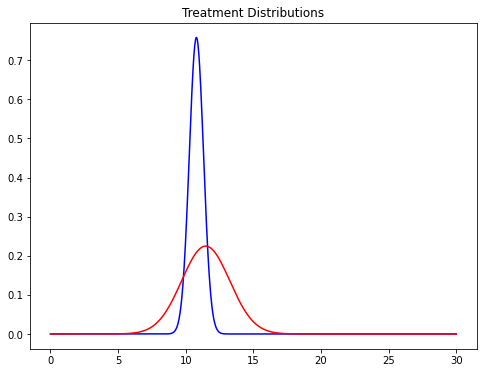

In [30]:
def gaussian(x, mu, sig):
    return 1./(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)

plt.figure(figsize=(8,6))
x_values = np.linspace(0, 30, 1000)

# generate gaussian curves with mu = 0, sigma = 5, 10
plt.plot(x_values, gaussian(x_values, data_med_dist.mean(), data_med_dist.std()), color = 'blue')
plt.plot(x_values, gaussian(x_values, (data_pl_dist.mean()), data_pl_dist.std()), color = 'red')

plt.title("Treatment Distributions")
plt.show()


### Base MAB Arm Class

In [31]:
class mab_arm:
    def __init__(self,distribution,name):
        self.times_sampled = 0
        self.distribution = distribution
        self.sampled_rewards = []
        self.rewards = 0
        self.mean = 0
        self.name = name
    
    def sample(self):
        self.times_sampled +=1
        temp = round(self.distribution.sample(n=1,replace=False,ignore_index=True)[0])
        self.sampled_rewards.append(temp)
        self.rewards += temp
        
        return temp
    
    def get_mean(self):
        if self.times_sampled == 0:
            return 0
        return self.rewards/self.times_sampled
    
    def get_std(self):
        sample_mean = self.get_mean()
        summation = 0
        for i in self.sampled_rewards:
            summation = (i - sample_mean)*(i - sample_mean)
        
        if len(self.sampled_rewards) > 2:
            return math.sqrt(summation/(len(self.sampled_rewards)-1))
        else:
            return 1
    
    def __str__(self):
#         return str(self.rewards)
        return  "Time sampled: "+str(self.times_sampled)+" Rewards: "+str(self.rewards)+" Sampled Rewards: "+str(self.sampled_rewards)

### Epsilon Greedy Strategy

In [32]:
class epsilon_greedy:
    def __init__(self,arms,epsilon):
        self.arms = arms
        self.total_reward = 0
        self.epsilon = epsilon
        
    def draw(self):
        p = np.random.random()
        if p < self.epsilon:
            choice = np.random.choice(len(self.arms))
        else:
            choice = np.argmin([a.get_mean() for a in self.arms])
        self.total_reward += self.arms[choice].sample()
        
    def simulate_for(self,rounds):
        for i in range(0,rounds):
            self.draw()
#         self.sim_results()
            
    def sim_results(self):
        for i in self.arms:
            print(i.name+" times sampled: "+str(i.times_sampled))
        
        print("Total Reward: "+str(self.total_reward))


### UCB Strategy

In [33]:
class UCB_Sampler:
    def __init__(self, list_position):
        self.position = list_position
        self.samples_sum = 0
        self.times_sampled = 0
        
    def add_reward(self, new_reward):
        self.samples_sum += new_reward
        self.times_sampled += 1
        
    def calculate_sample_mean(self):
        return self.samples_sum / self.times_sampled
    
    def calculate_UCB_score(self, iteration_number):
        current_mean = self.calculate_sample_mean()
        hoffding_ineq = math.sqrt(
            (2*math.log(iteration_number))
            /(self.times_sampled)
        )
        return current_mean + hoffding_ineq
    
def simulate_UCB(distributions, iterations):
    UCB_rewards = 0
    predictor_dist = []
    for i in range(len(distributions)):
        predictor_dist.append(UCB_Sampler(i))
        current_rw = distributions[i].sample()
        predictor_dist[i].add_reward(current_rw)
        UCB_rewards += current_rw
        
    for i in range(len(distributions), iterations):
        best_distr = min(predictor_dist, key=lambda dist: dist.calculate_UCB_score(i))
        current_rw = distributions[best_distr.position].sample()
        predictor_dist[best_distr.position].add_reward(current_rw)
        UCB_rewards += current_rw
        
        
    return UCB_rewards


### Thompson Sampling Strategy

In [34]:
class Thompson_Sampler:
    def __init__(self, mean, std, position):
        self.position = position
        self.samples_sum = 0
        self.times_sampled = 0
        self.std = std
        self.mean = mean
    def sample_dist(self):
        return np.random.normal(self.mean, self.std)
    def update_dist(self, reward):
        self.samples_sum += reward
        self.times_sampled += 1
        self.std = (1/self.times_sampled) ** 0.5
        self.mean = self.samples_sum/self.times_sampled

def simulate_Thompson_sampling(distributions, iterations):
    thompson_samplers = []
    for i in range(len(distributions)):
        thompson_samplers.append(Thompson_Sampler(0, 1000, i))
    
    thompson_rewards = 0
    for i in range(iterations):
        best_sampler = min(thompson_samplers, key=lambda sampler: sampler.sample_dist())
        current_rw = distributions[best_sampler.position].sample()
        thompson_samplers[best_sampler.position].update_dist(current_rw)
        thompson_rewards += current_rw
        
    return thompson_rewards


### Random Strategy

In [35]:
def simulate_random(distributions, iterations):
    random_rewards = 0
    
    for i in range(iterations):
        random_distr = random.choice(distributions)
        random_rewards += random_distr.sample()
    
    return random_rewards

### Real Strategy

In [36]:
def simulate_real(distributions, iterations):
    rewards = 0
    for i in range(round(iterations/2)):
        rewards += distributions[0].sample()
        
    for i in range(round(iterations/2)):
        rewards += distributions[1].sample()
    
    return rewards


## Simulations
-----

In [37]:
def get_z_values(placebo,treatment):
    z = (treatment.get_mean()-placebo.get_mean())/math.sqrt(treatment.get_std()+placebo.get_std())
    return z
def get_p_values(placebo,treatment):
    z_scores = get_z_values(placebo,treatment)
    return norm.sf(abs(z_scores))

In [38]:
print("std ",treatment.get_std(),"mean ",treatment.get_mean())

NameError: name 'treatment' is not defined

In [39]:
plt.figure(figsize=(8,6))
x_values = np.linspace(15, 19, 10000)

# generate gaussian curves with mu = 0, sigma = 5, 10
plt.plot(x_values, gaussian(x_values, treatment.get_mean(), treatment.get_std()), color = 'blue')
plt.plot(x_values, gaussian(x_values, placebo.get_mean(), placebo.get_std()), color = 'red')

plt.title("Flattening the curve")
plt.show()


NameError: name 'treatment' is not defined

<Figure size 576x432 with 0 Axes>

In [40]:
get_z_values(placebo,treatment)

NameError: name 'placebo' is not defined

In [197]:
get_p_values(placebo,treatment)

array([7.68729897e-13, 9.49697971e-94])

#### Thompson Strategy Simulation

In [41]:
simulation_data = pd.DataFrame(columns=['n1','n2','p-values'])
top = 10000
for i in range(0,top):
    placebo = mab_arm(data_pl_dist,"placebo")
    treatment = mab_arm(data_med_dist,"treatment")
    simulate_Thompson_sampling([placebo,treatment],96)
    p = get_p_values(placebo,treatment)
    simulation_data = simulation_data.append({'n1':treatment.times_sampled,'n2':placebo.times_sampled,'p-values':p},ignore_index=True)
simulation_data.to_csv('data/thompson_low.csv')

#### UCB Strategy Simulations

In [42]:
simulation_data2 = pd.DataFrame(columns=['n1','n2','p-values'])
top = 10000
for i in range(0,top):
    placebo = mab_arm(data_pl_dist,"placebo")
    treatment = mab_arm(data_med_dist,"treatment")
    simulate_UCB([placebo,treatment],96)
    p = get_p_values(placebo,treatment)
    simulation_data2 = simulation_data2.append({'n1':treatment.times_sampled,'n2':placebo.times_sampled,'p-values':p},ignore_index=True)
simulation_data2.to_csv('ucb_low.csv')

#### Random Strategy Simulation

In [ ]:
simulation_data3 = pd.DataFrame(columns=['n1','n2','p-values'])
top = 1000
for i in range(0,top):
    placebo = mab_arm(data_pl_dist,"placebo")
    treatment = mab_arm(data_med_dist,"treatment")
    simulate_random([placebo,treatment],96)
    p = get_p_values(placebo,treatment)
    simulation_data3 = simulation_data3.append({'n1':treatment.times_sampled,'n2':placebo.times_sampled,'p-values':p},ignore_index=True)
simulation_data3.to_csv('random_low.csv')

#### Real Strategy Simulation

In [205]:
simulation_data4 = pd.DataFrame(columns=['n1','n2','p-values'])
top = 1000
for i in range(0,top):
    placebo = mab_arm(data_pl_dist,"placebo")
    treatment = mab_arm(data_med_dist,"treatment")
    simulate_real([placebo,treatment],96)
    p = get_p_values(placebo,treatment)
    simulation_data4 = simulation_data4.append({'n1':treatment.times_sampled,'n2':placebo.times_sampled,'p-values':p},ignore_index=True)
simulation_data4.to_csv('real_low.csv')

#### Epsilon Greedy Simulations

In [44]:
simulation_data5 = pd.DataFrame(columns=['n1','n2','p-values'])
top = 10000
for i in range(0,top):
    placebo = mab_arm(data_pl_dist,"placebo")
    treatment = mab_arm(data_med_dist,"treatment")

    e_greedy_sim = epsilon_greedy([placebo, treatment],0.2)
    e_greedy_sim.simulate_for(96)
    p = get_p_values(placebo,treatment)
    simulation_data5 = simulation_data5.append({'n1':treatment.times_sampled,'n2':placebo.times_sampled,'p-values':p},ignore_index=True)
simulation_data5.to_csv('egreedy_low.csv')

In [77]:
simulation_data5["n1"].mean()

80.556